In [108]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import random
from sys import exit
import csv
import itertools as it
import os

from collections import defaultdict as dd

import pandas as pd

In [109]:
rec_dd = lambda: dd(rec_dd)

def dd_to_dict(d):
    if isinstance(d, dd):
        d = {k: dd_to_dict(v) for k, v in d.items()}
    return d

In [110]:
apps = ["BT", "CG", "EP", "FT", "IS", "LU", "MG", "SP"]
labels = apps

script_name = "mysim_rroute_trace.py"
script_dir = "../src_nnc_calc1"
tp_dir = "rtgen_rr_edgefiles"
txt_dir = "rtgen_rr_edgefiles"
tr_dir = "trfiles"
log_dir = "log_rroute"
net_name = "reconfroute"

num_splits = [2**i for i in range(14)]
legends = num_splits

tr_names = [
    "crossbar_64_bt.W.64_trace_1.00e09_4096_620085_62590300.tr",
    "crossbar_64_cg.W.64_trace_1.00e09_4096_267004_41961500.tr",
    "crossbar_64_ep.W.64_trace_1.00e09_4096_2655_9327740.tr",
    "crossbar_64_ft.W.64_trace_1.00e09_4096_18223_2379540.tr",
    "crossbar_64_is.W.64_trace_1.00e09_4096_53946_4909650.tr",
    "crossbar_64_lu.W.64_trace_1.00e09_4096_2163744_243721000.tr",
    "crossbar_64_mg.W.64_trace_1.00e09_4096_72726_5670700.tr",
    "crossbar_64_sp.W.64_trace_1.00e09_4096_1234359_134421000.tr"
]

tr_app = dict(zip(tr_names, apps))
print(tr_app)

num_node = 64
degree_seeds = [(4,1),(8,4)]

# trans_margins = [1,5,10]
trans_margin = 10


{'crossbar_64_bt.W.64_trace_1.00e09_4096_620085_62590300.tr': 'BT', 'crossbar_64_cg.W.64_trace_1.00e09_4096_267004_41961500.tr': 'CG', 'crossbar_64_ep.W.64_trace_1.00e09_4096_2655_9327740.tr': 'EP', 'crossbar_64_ft.W.64_trace_1.00e09_4096_18223_2379540.tr': 'FT', 'crossbar_64_is.W.64_trace_1.00e09_4096_53946_4909650.tr': 'IS', 'crossbar_64_lu.W.64_trace_1.00e09_4096_2163744_243721000.tr': 'LU', 'crossbar_64_mg.W.64_trace_1.00e09_4096_72726_5670700.tr': 'MG', 'crossbar_64_sp.W.64_trace_1.00e09_4096_1234359_134421000.tr': 'SP'}


   app    1    2         4         8        16        32        64       128  \
BT  BT  1.0  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
CG  CG  1.0  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
EP  EP  1.0  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
FT  FT  1.0  1.0  1.000000  1.000000  1.000000  1.000000  1.023014  1.029900   
IS  IS  1.0  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  0.999824   
LU  LU  1.0  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
MG  MG  1.0  1.0  0.999326  0.995791  0.995809  0.995154  0.994900  0.994511   
SP  SP  1.0  1.0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

         256       512      1024      2048      4096      8192  
BT  1.000000  0.997802  0.996310  0.995413  0.993320  0.989898  
CG  1.000000  1.000000  1.000000  1.000000  0.998139  0.991021  
EP  1.000000  1.000000  1.004591  1.001169  0.973633  0.967315  
FT  1.050646  1.023

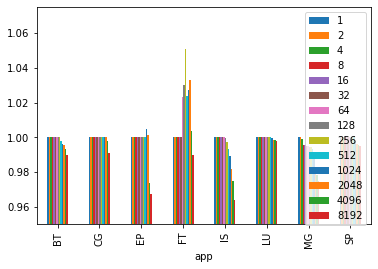

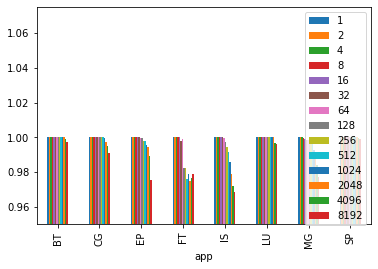

In [111]:
plot_data = rec_dd()

for (degree, num_seed) in degree_seeds:
    heights = [[0.0 for _ in labels] for _ in legends]

    for num_split, tr_name in it.product(num_splits, tr_names):
        tp_name = "{}_{}_{}_hops_ud.tp".format(num_node, degree, num_seed)
        txt_name = "{}_{}_{}_{}_{}.txt".format(tr_name, num_split, degree, num_seed, trans_margin)
        rlog_name = "%s_%s_%s.rlog" % (tp_name, txt_name, tr_name)
        if not os.path.exists(os.path.join(log_dir, rlog_name)):
            print("no such file:", rlog_name)
            continue

        with open(os.path.join(log_dir, rlog_name)) as f:
            reader = csv.reader(f, delimiter=' ')
            l = [row for row in reader]
            # print(l)
            l_data = [float(i) for i in l[0]]
            # print(l_data)
            heights[num_splits.index(num_split)][tr_names.index(tr_name)] = l_data[1]

    # print(heights)

    height_base = list(heights[0])
    for j, height in enumerate(heights):
        for i in range(len(height)):
            if j == 0:
                plot_data["app"][labels[i]] = labels[i]
            height[i] = height[i] / height_base[i]
            plot_data[legends[j]][labels[i]] = height[i]
            # exit(1)
        # print(edge_basename)
    # print(heights)

    plot_data = dd_to_dict(plot_data)
    # print(plot_data)

    df = pd.DataFrame(plot_data)
    print(df)

    df.plot(x="app", y=[2 ** i for i in range(14)], kind="bar", ylim=[0.95,1.075])

    # print(df.min())
    print("IS-8192:")
    print(df.loc["IS",8192])
    print(1.0-df.loc["IS",8192])
    
